Импортируйте нужные библиотеки
===
Мы уже много работали с  pandas, numpy и различными инструментами визуализации. Поэтому предлагаем вам самим импортировать те библиотеки, которые вам нужны для выполнения домашнего задания 

Временной ряд 
=== 
В папке datasets у нас находится множество различных временных рядов, которые состоят из двух колонок - времени и значения. Можно взять любые данные на выбор, кроме того, который мы разобрали на лекции (shampoo_sales). 

Задание 
==

* Сделайте визуализацию ряда
* Разбейте его на компоненты
* Проверьте автокорреляцию
* Примените одну или несколько трансформаций, разобранных на лекции

# Решение

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.graph_objects import *
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [70]:
df = pd.read_csv('../datatest/Rossman_sales.csv')

In [71]:
df.head()

,Date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


In [72]:
df['Date'] = pd.to_datetime(df['Date'])

In [73]:
df.set_index('Date',inplace=True)

In [74]:
df = df.resample('MS').sum()

In [75]:
df.sort_values(by='Date',inplace=True)

In [76]:
df.head()

,Sales
Date,
2013-01-01,180132207
2013-02-01,171534275
2013-03-01,201180369
2013-04-01,183431432
2013-05-01,185411063


In [77]:
s = df['Sales']

In [78]:
s

Date
2013-01-01    180132207
2013-02-01    171534275
2013-03-01    201180369
2013-04-01    183431432
2013-05-01    185411063
2013-06-01    180702351
2013-07-01    208843882
2013-08-01    198042727
2013-09-01    178053963
2013-10-01    187662330
2013-11-01    196170924
2013-12-01    231710561
2014-01-01    187752787
2014-02-01    178924677
2014-03-01    193019854
2014-04-01    194544977
2014-05-01    194693257
2014-06-01    190047051
2014-07-01    173892707
2014-08-01    163748475
2014-09-01    164516168
2014-10-01    164216398
2014-11-01    173327953
2014-12-01    202120592
2015-01-01    198843730
2015-02-01    178275458
2015-03-01    205631683
2015-04-01    197918886
2015-05-01    189143897
2015-06-01    207363373
2015-07-01    212322616
Freq: MS, Name: Sales, dtype: int64

<AxesSubplot:xlabel='Date'>

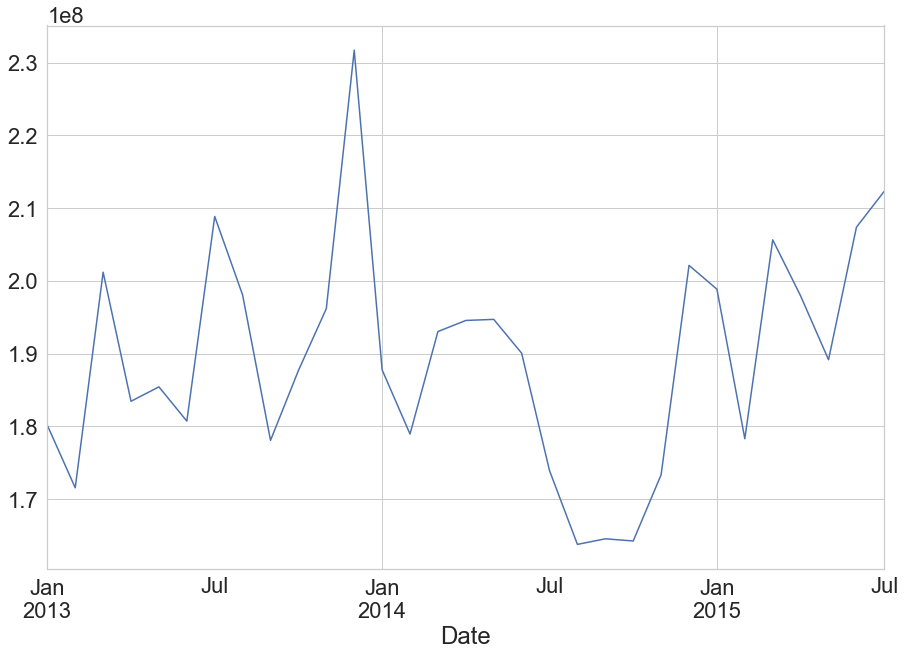

In [79]:
s.plot()

# Декомпозиция

In [80]:
result = seasonal_decompose(s, model='additive')

<AxesSubplot:xlabel='Date'>

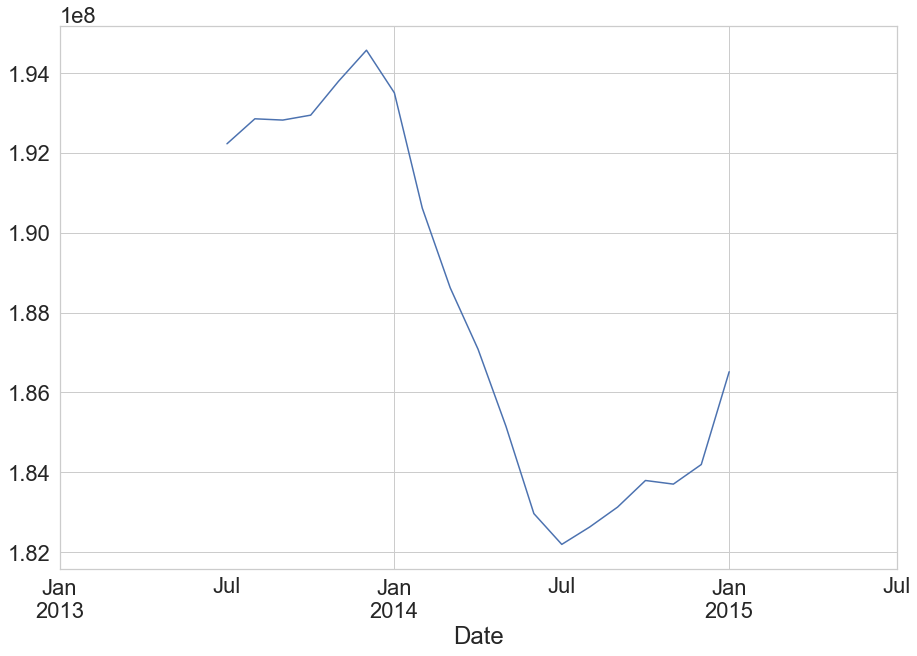

In [81]:
result.trend.plot()

<AxesSubplot:xlabel='Date'>

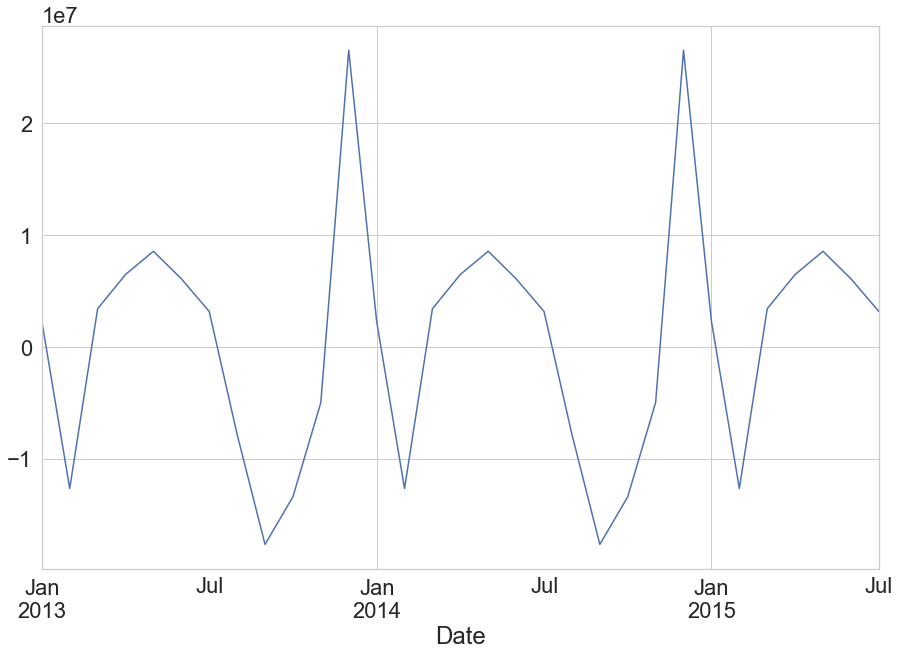

In [82]:
result.seasonal.plot()

<AxesSubplot:xlabel='Date'>

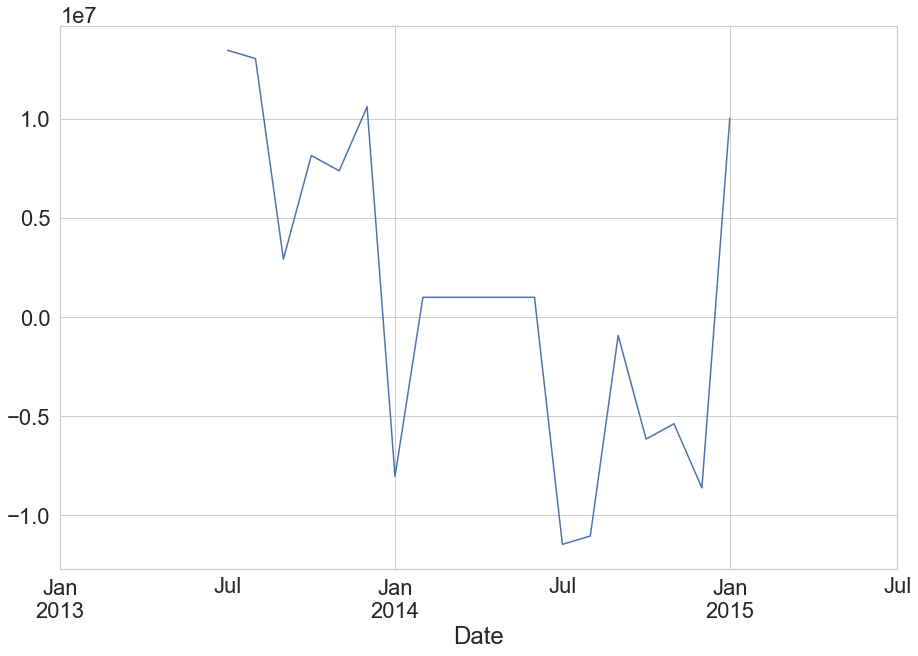

In [83]:
result.resid.plot()

# Автокорреляция

In [84]:
df_corr = df.copy()

In [85]:
for i in range(1,10):
    df_corr[f'lag-{i}'] = df_corr['Sales'].shift(i)

In [86]:
df_corr[[f'lag-{i}'for i in range(1,10)]+['Sales']].corr()['Sales']

lag-1    0.337470
lag-2   -0.010361
lag-3    0.082392
lag-4    0.136865
lag-5    0.015470
lag-6   -0.149291
lag-7   -0.200130
lag-8   -0.343360
lag-9   -0.265720
Sales    1.000000
Name: Sales, dtype: float64

# Трансформация

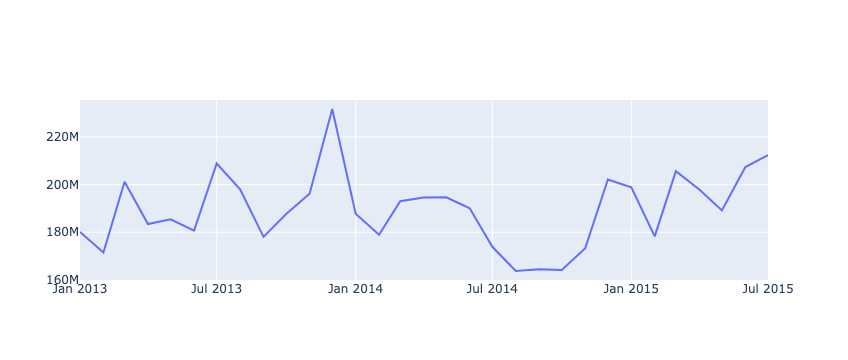

In [90]:
iplot(Figure(data=Scatter(x=df.index, y=df['Sales'])))

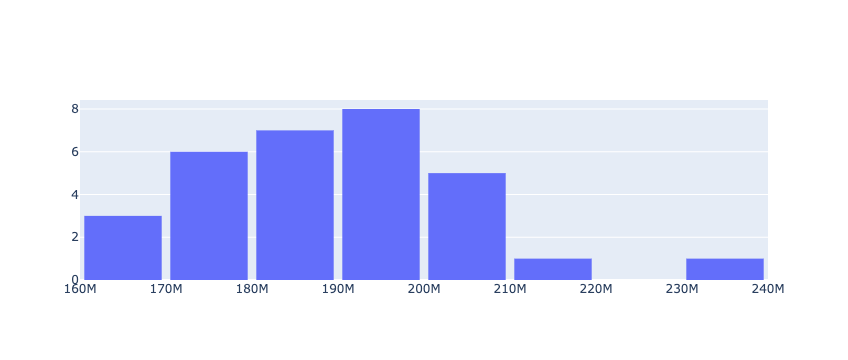

In [91]:
iplot(Figure(data=Histogram(x=df['Sales']),
            layout = Layout(bargap=0.1)))

## Power transform

In [105]:
from scipy.optimize import curve_fit

def func(x,p,a):
    return x**p+a

x = [i for i in range(len(df))]

popt, _ = curve_fit(func,x,  df['Sales'])
p = popt[0]
a = popt[1]
print(p,a)
y_hat = func(x,p,a)

4.898101709365889 186353485.06424534


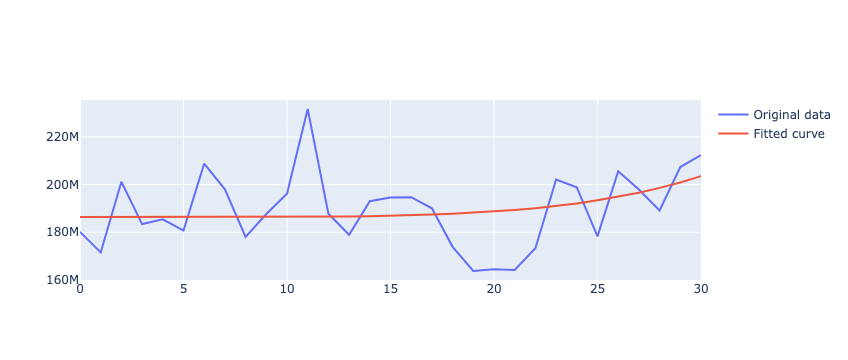

In [106]:
trace1 = Scatter(x=x,y=df['Sales'], name = 'Original data')
trace2 = Scatter(x=x,y=y_hat, name = 'Fitted curve')

iplot(Figure(data=[trace1,trace2]))

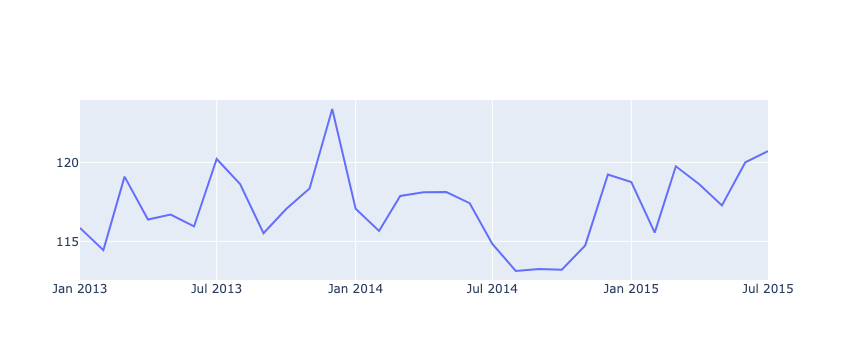

In [111]:
df['power_transormed'] = np.sqrt(np.sqrt(df['Sales']))

trace1 = Scatter(x=df.index,y=df['power_transormed'], name = 'Transformed data')

iplot(Figure(data=[trace1]))

<AxesSubplot:xlabel='Date'>

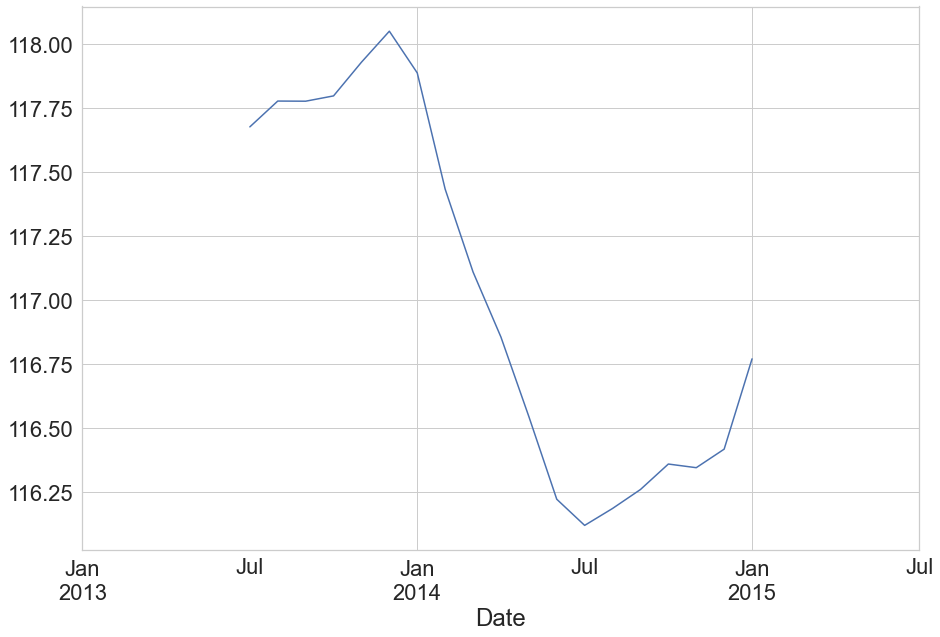

In [108]:
s=pd.Series(index=df.index,
           data=df['power_transormed'].values)
result = seasonal_decompose(s, model='additive')
result.trend.plot()

## Log transform

In [113]:
df['exp_data']=np.exp(df['power_transormed'])

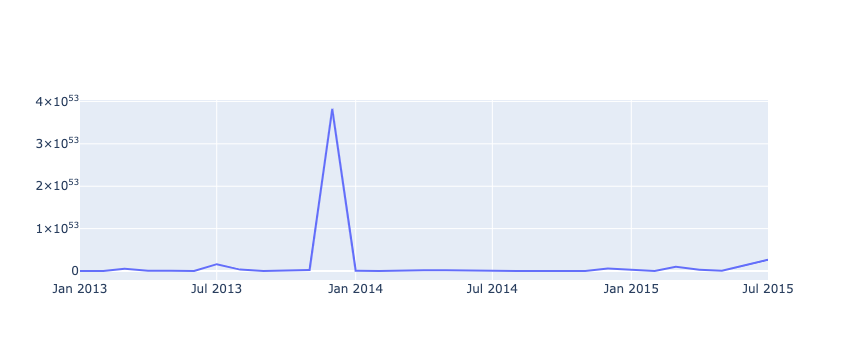

In [114]:
iplot(Figure(data=Scatter(x=df.index,y=df['exp_data'])))

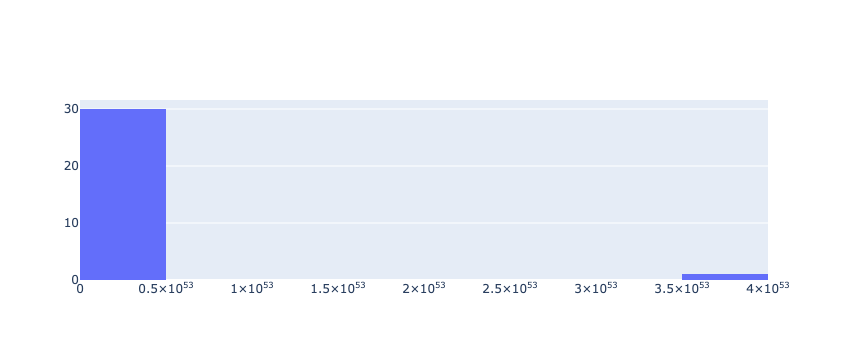

In [115]:
iplot(Figure(data=Histogram(x=df['exp_data'])))

## Box-Cox Transform

In [116]:
from scipy.stats import boxcox

In [117]:
df['boxcos']=boxcox(df['Sales'],lmbda=0)

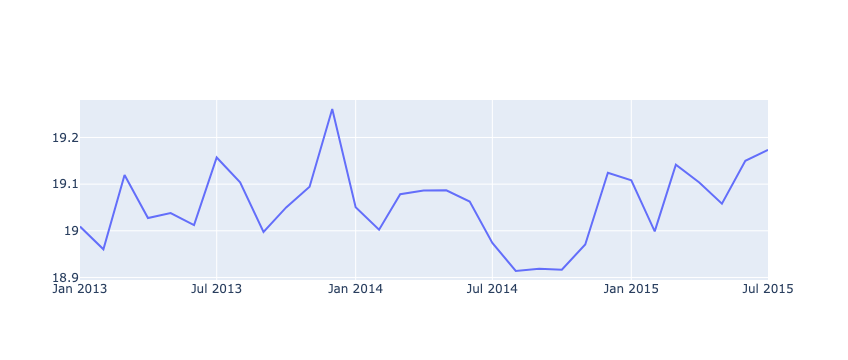

In [118]:
iplot(Figure(data=Scatter(x=df.index,y=df['boxcos'])))

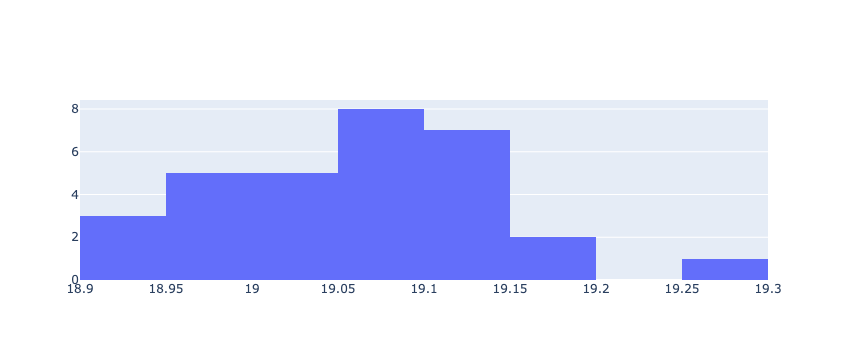

In [119]:
iplot(Figure(data=Histogram(x=df['boxcos'])))